# Project:
Data Description: The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Domain: Banking

Context: This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

**Objective:** The classification goal is to predict the likelihood of a liability customer buying
personal loans

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
#Read bank data from csv file and display top 5 records 
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#Create a copy of original dataframe for data manipulation
bank_df = bank

In [5]:
#As personal loan is the target variable, rearranging it dataframe to drop the 'personal_loan' column from original place
#and append at the end
personal_loan = bank['Personal Loan']
bank_df.drop(['Personal Loan'], inplace = True, axis = 1)
bank['Personal Loan'] = personal_loan

In [6]:
bank.head(20)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,0
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,0
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1


### Question 1:  Read the column description and ensure you understand each attribute well

#### Data Exploration

In [7]:
#Get datatypes of each column - convert object data type(if any) to categorical data
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the columns/attributes have 5000 non-null values.

In [8]:
# Check if any missing value
bank.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
Personal Loan         False
dtype: bool

There is no null value present in the dataframe.

**Understanding from the above dataframe :-**
 
- The ID variable can be ignored as it will not any effect on our model. As we know customer Id is just to maitain the record in   serial order. There is no relationship with Id and Loan.
- Target Variable is Personal Loan which describe whether the person has taken loan or not. This is the variable which we need  to predict.

Nonimal Varibles :

- ID - Customer ID
- ZIP Code - Home Address ZIP code of the customer. This variable can also be ignored becasue we can not judge the customers based on thier area or location.

Ordinal Categorical variables :

- Family - Number of famlily member of the customer
- Education - Education level of the customer. In our dataset it ranges from 1 to 3 which are Under Graduate, Graduate and Post Graduate respectivly.

Interval Variables :

- Age - Age of the customer
- Experience - Years of experience of customer has
- Income - Annual Income of the customer which is in dollars
- CCAvg - Avg. spending on credit cards per month which in dollars.
- Mortgage - Value of House Mortgage

Binary Categorical Variable :

- CD Account - Does the customer have CD Account with bank or not?
- Security Account - Does the customer have Security Account with bank or not?
- Online - Does the customer have Online banking facility with bank or not?
- Credit Card - Does the customer have a credit card issued by Universal Bank or not?
- Personal Loan - This our target variable which we have to predict. This indicates that the customer has token loan or not?

In [9]:
# Checking the unique data
bank.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

In [10]:
#Five point summary of  attributes and label
#Transposing index and columns
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


Observation:

- Important : Here we can see that minumum value of Experience column is -3.0 which could be a mistake because Experience can not be negative. This will be corrected in data cleaning and error fixing part.
- Binary varibales 'Personal Loan', 'Credit Card', 'Online', 'CD Account', 'Security Account' has clean data.
- Ordinal Cat variables 'Family' and 'Education' are also clean.
- Target variable also looks fine.

## Question 2: Study the data distribution in each attribute, share your findings

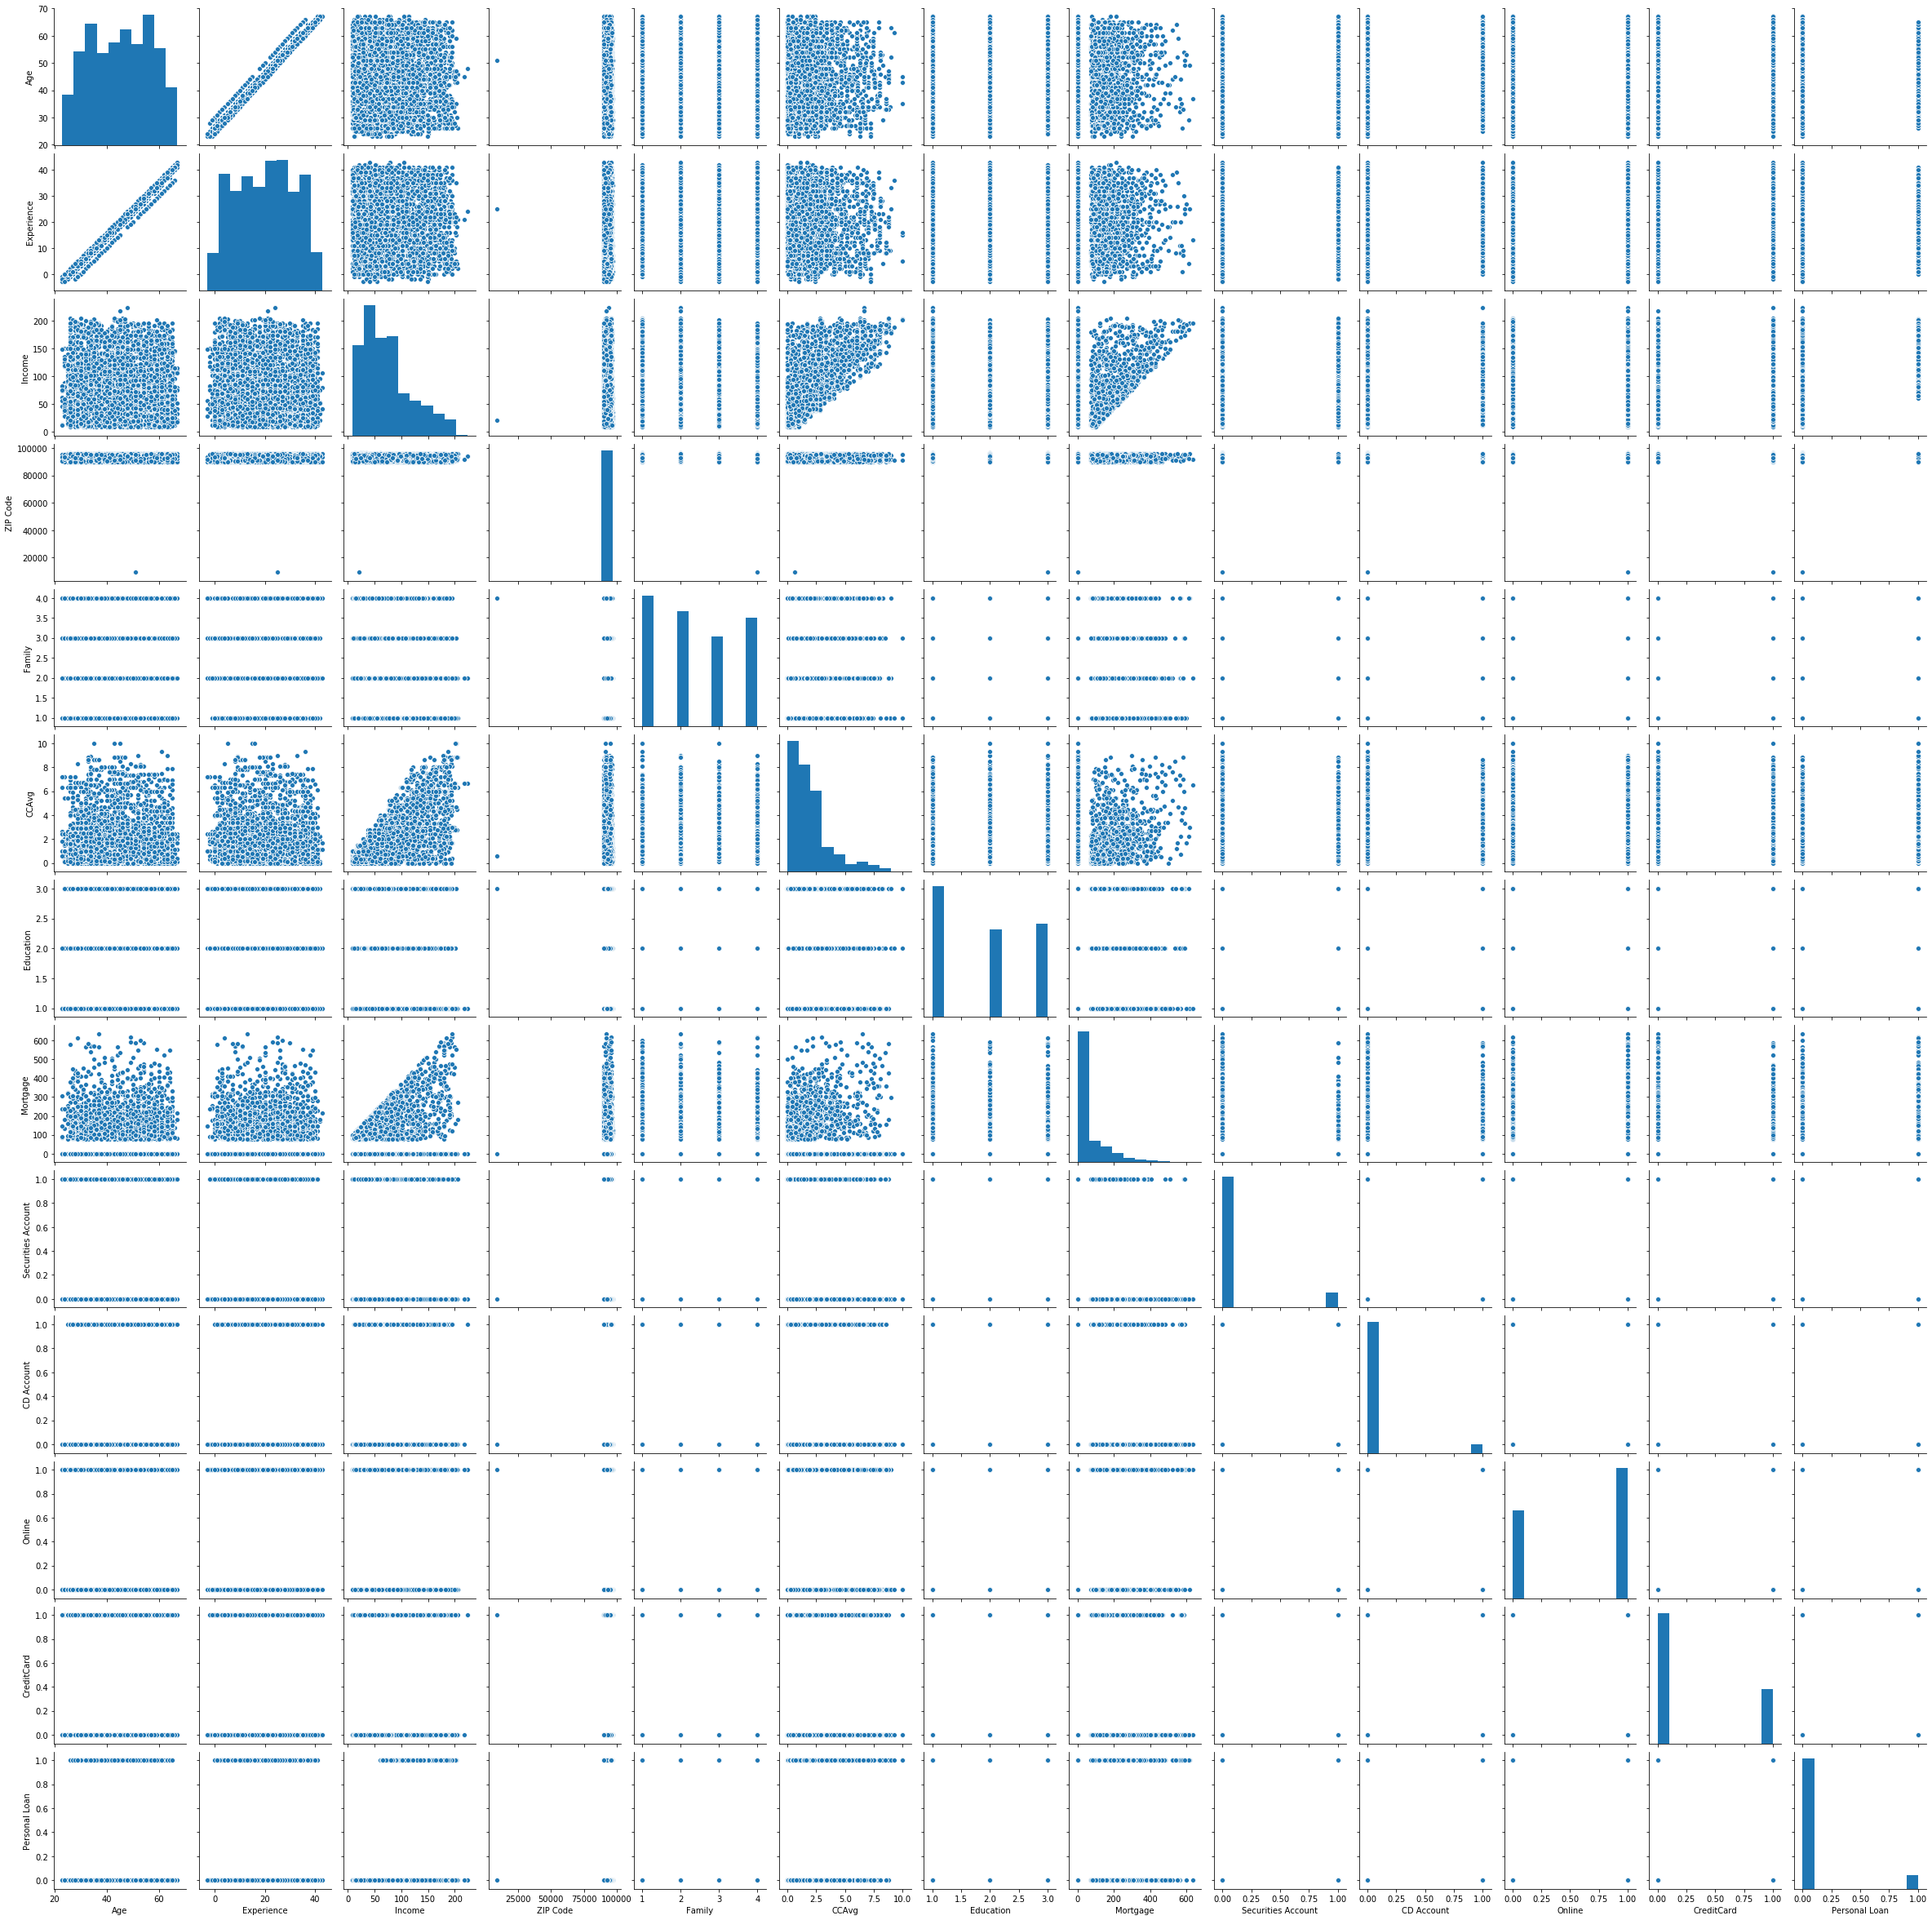

In [11]:
## Pair plot that includes all the columns of the data frame
#ID column in the pair plot is not relevent as it is only for record index
sns.pairplot(bank.iloc[:,1:])

**Observation** : From the above pair plot we can infer the association among the attributes and target column as follows:

- 'Age' column is normally distributed. Most of the customers age is between 25 to 65 years.
- 'Experience' is also mormally distributed. 'Experience' and 'Age' are stong possitive association.
- 'Income' is positively skewed and it also has outliers
- We dont see any relationship with the ZIP Code and other variables.
- Family and Education has low association with the 'Personal Loan'.
- The disribution of CCAvg is also a possotively skewed variable. 
- 'Mortgage' is also positively skewed.

**Error Fixing(Data Cleaning)**

In [12]:
#Checking negative values for experience
bank[bank['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [13]:
bank['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
bank['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
bank['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )

In [14]:
bank['Experience'].isnull().sum()

52

There are 52 values in Experience which had -ve values, now is replaced by nan values. 
Now we will fill it with the median values.

In [15]:
bank['Experience'].fillna(bank['Experience'].median(),inplace=True)

In [16]:
bank.Experience.describe().T

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Now we can see the min is 0.0 which was -3.0 before error fixing.

**Data distribution in each attribute :-**

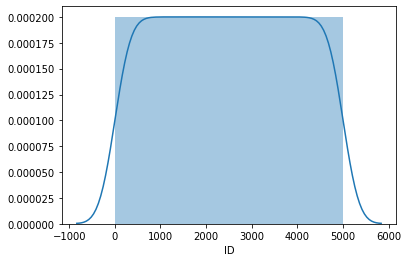

In [17]:
#Id Column Distribution
sns.distplot(bank['ID'])

**Observation:** The above graph is unform distribution.

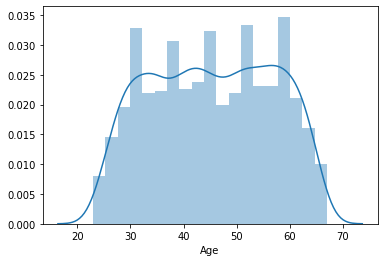

In [18]:
#Age Column distribution
sns.distplot(bank['Age'])

**Observation**: Age column is normaly distrubuted.

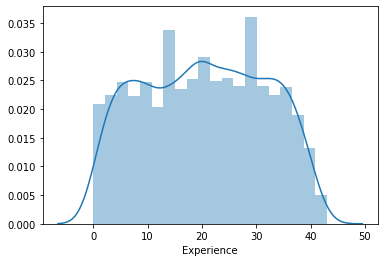

In [19]:
#Experience column distribution
sns.distplot(bank['Experience'])

**Observation:** Experience is normaly distributed.

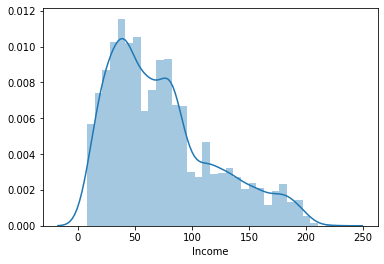

In [20]:
#Income column Distribution
sns.distplot(bank['Income'])

**Observation**: The above distribution is right skewed distribution.

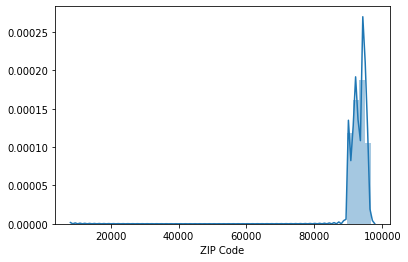

In [21]:
#ZIP Code column Distribution
sns.distplot(bank['ZIP Code'])

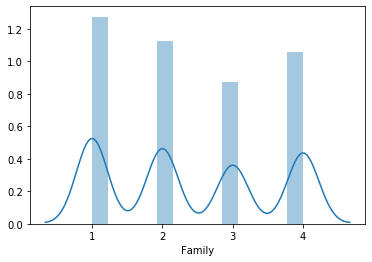

In [22]:
#Family column Distribution
sns.distplot(bank['Family'])

**Observation**: The Family column is uniformaly distributed. Data points are more with family size 1 and 2.

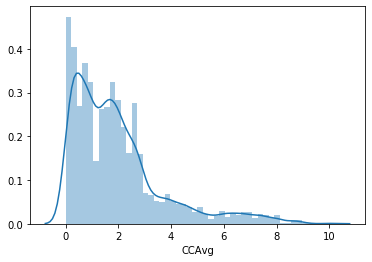

In [23]:
##CCAvg column Distribution
sns.distplot(bank['CCAvg'])

**Observation**: The above distributionis is right skewed distribution because the tail goes to the right. Most of the customers monthly avg. spending on credit cards is between 1k to 2.5K. There are very few customers whose monthly avg. spending on credit card is more than 8k.

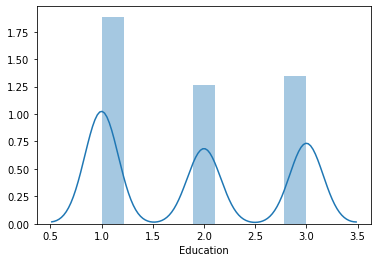

In [24]:
#Education column distribution
sns.distplot(bank['Education'])

**Observation**: Undergrad level customers are more than the Graduate and Advanced/Professional customers.

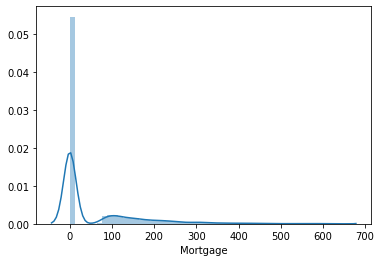

In [25]:
#Mortgage column distribution
sns.distplot(bank['Mortgage'])

**Observation**:The above distribution is is right skewed distribution. Most of the customers do not have mortgage

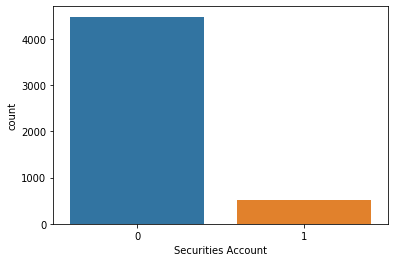

In [26]:
#Securities Account column distribution
sns.countplot(bank['Securities Account'])

**Observation**: The distribution follows Bernoulli's distribution. Most of the customers do not have securities account

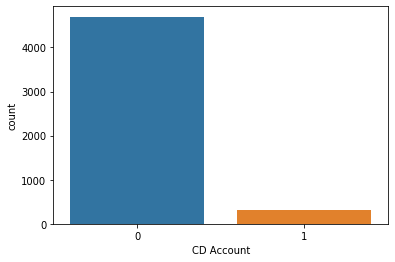

In [27]:
#CD Account column distribution
sns.countplot(bank['CD Account'])

**Observation**: The distribution follows Bernoulli's distribution. Few customers have a certificate of deposit (CD) account with the bank

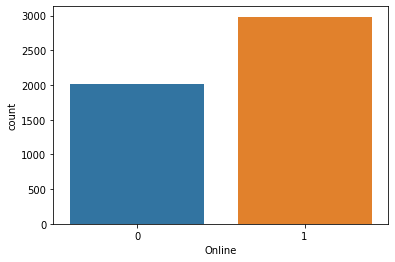

In [28]:
#Online column distribution
sns.countplot(bank['Online'])

In [29]:
bank.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**Observation**: The distribution follows Bernoulli's distribution. There are 2984 customers who use Internet banking, and 2016 customers who do not use Internet banking

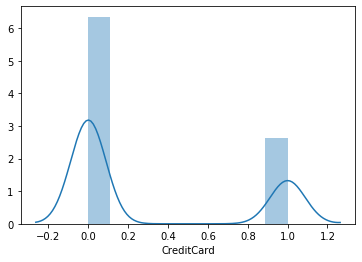

In [30]:
#Credit card column distribution
sns.distplot(bank['CreditCard'])

In [31]:
bank.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

**Observation**: The distribution follows Bernoulli's distribution. There are 1470 customers who have Credit Card, and 3530 customers who do not use Credit cards

#### Correlation using Heatmap

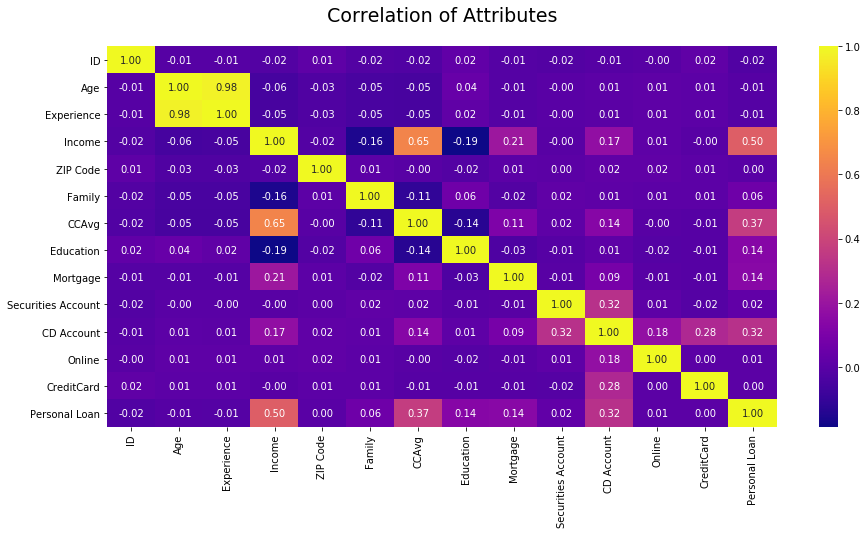

In [32]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(bank.corr(), cmap='plasma',annot=True, fmt='.2f')

## Question 3: Get the target column distribution. Your comments

In [33]:
bank["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

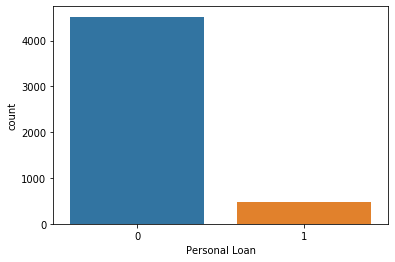

In [34]:
sns.countplot(bank["Personal Loan"])

**Observation**: There are 4520 customers who didn't take loan and 480 customers who took loan

In [35]:
Total = len(bank[bank["Personal Loan"]==0]) + len(bank[bank["Personal Loan"]==1])
print('% of customer who took loan=', len(bank[bank["Personal Loan"]==1])/Total * 100)
print('% of customer who did not take loan=', len(bank[bank["Personal Loan"]==0])/Total * 100)

% of customer who took loan= 9.6
% of customer who did not take loan= 90.4


In [36]:
bank.groupby(bank['Personal Loan']).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.378982,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


Observations: 
- The average Income of customers who took loan is more than double of the avg income of customers who didn’t take loan last year.
- The Avg. spending on credit cards per month ($000) is also more than double for the customer's who took loan.
- The average mortage for loan availing customers is approximately double for the not availing customers.
- Avg literacy is less for non loan takers.

## Question 4: Split the data into training and test set in the ratio of 70:30 respectively

As stated earlier, columns 'Id' and 'Zip Code' are not much relevant for our model building. Hence dropping those columns.
Also, Age and Experience are highly correlated. One of them can be dropped

In [37]:
bank.drop(['ID','ZIP Code','Experience'],inplace=True,axis=1)
bank.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,49,4,1.6,1,0,1,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1,0


In [38]:
#Spliting the data. We will use 70% of data for training and 30% for testing.
array = bank
X = array.drop(['Personal Loan'], axis = 1) #Feature columns
Y = array['Personal Loan'] #Predicted Output column

In [39]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,1.939449e-16,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-2.123482e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,5.263146e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,3.263712e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.3, random_state=1)

In [41]:
#Checking % of data split 
print("{0:0.2f}% data is in training set".format((len(x_train)/len(bank.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bank.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [42]:
#Checking % of data split in the output variable
print("Original Personal Loan 1 Values    : {0} ({1:0.2f}%)".format(len(bank.loc[bank['Personal Loan'] == 1]), (len(bank.loc[bank['Personal Loan'] == 1])/len(bank.index)) * 100))
print("Original Personal Loan 0 Values   : {0} ({1:0.2f}%)".format(len(bank.loc[bank['Personal Loan'] == 0]), (len(bank.loc[bank['Personal Loan'] == 0])/len(bank.index)) * 100))
print("")
print("Training Personal Loan 1 Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan 0 Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan 1 Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan 0 Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan 1 Values    : 480 (9.60%)
Original Personal Loan 0 Values   : 4520 (90.40%)

Training Personal Loan 1 Values    : 331 (9.46%)
Training Personal Loan 0 Values   : 3169 (90.54%)

Test Personal Loan 1 Values        : 149 (9.93%)
Test Personal Loan 0 Values       : 1351 (90.07%)



## Question 5: Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

**A> Logistic Regression**

In [43]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
logreg_model = LogisticRegression(solver="liblinear")
logreg_model.fit(x_train, y_train)
#predict on test
y_predict_logreg = logreg_model.predict(x_test)

In [44]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg_model.score(x_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.95


In [45]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_model.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


**B> KNN Model**

In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')

# Call Nearest Neighbour algorithm
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [47]:
y_pred_kNN = classifier.predict(x_test)

In [48]:
print('Accuracy of k Nearest Neighbour model on train set: {:.2f}'.format(classifier.score(x_train, y_train)))

Accuracy of k Nearest Neighbour model on train set: 1.00


In [49]:
print('Accuracy of k Nearest Neighbour model on test set: {:.2f}'.format(classifier.score(x_test, y_test)))

Accuracy of k Nearest Neighbour model on test set: 0.96


**C> Naive Bayes Algorithm Model**

In [50]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
bayes_model = GaussianNB()

bayes_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
#Performance of our model with training data
bayes_train_predict = bayes_model.predict(x_train)

from sklearn import metrics

print("Accuracy of Naive Bayes Model on training set: {0:.4f}".format(metrics.accuracy_score(y_train, bayes_train_predict)))
print()

Accuracy of Naive Bayes Model on training set: 0.8894



In [52]:
#Performance of our model with testing data
bayes_test_predict = bayes_model.predict(x_test)

from sklearn import metrics

print("Accuracy of Naive Bayes Model on test set: {0:.4f}".format(metrics.accuracy_score(y_test, bayes_test_predict)))
print()

Accuracy of Naive Bayes Model on test set: 0.8747



## Question 6: Print the confusion matrix for all the above models

**Confusion metrics of Logistic Regression Model**

Confusion Matrix


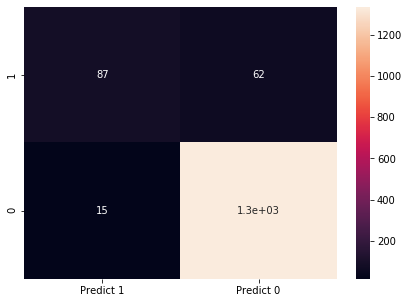

In [53]:
from sklearn.metrics import confusion_matrix,classification_report
print("Confusion Matrix")
cm_logreg=metrics.confusion_matrix(y_test, y_predict_logreg, labels=[1, 0])

df_cm_logreg = pd.DataFrame(cm_logreg, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_logreg, annot=True)

In [54]:
confusion_matrix_lgreg = confusion_matrix(y_test, y_predict_logreg)
print(confusion_matrix_lgreg)

[[1336   15]
 [  62   87]]


In [55]:
print(classification_report(y_test, y_predict_logreg))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.85      0.58      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500



The confusion matrix

True Positives (TP): we correctly predicted that they accepted personal loan = 87

True Negatives (TN): we correctly predicted that they did not accept personal loan = 1336

False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") = 15 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they have not accepted personal loan (a "Type II error") 62 Falsely predict negative Type II error

**Confusion metrics of kNN Model**

Confusion Matrix


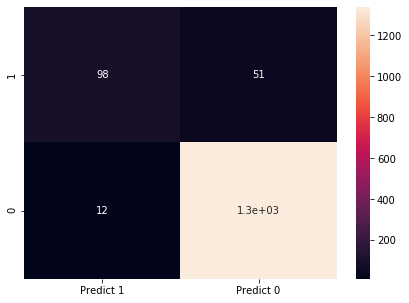

In [56]:
print("Confusion Matrix")
cm_kNN=metrics.confusion_matrix(y_test, y_pred_kNN, labels=[1, 0])

df_cm_kNN = pd.DataFrame(cm_kNN, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_kNN, annot=True)

In [57]:
confusion_matrix_kNN = confusion_matrix(y_test, y_pred_kNN)
print(confusion_matrix_kNN)

[[1339   12]
 [  51   98]]


The confusion matrix

True Positives (TP): we correctly predicted that they accepted personal loan = 98

True Negatives (TN): we correctly predicted that they did not accept personal loan = 1339

False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") = 12 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they have not accepted personal loan (a "Type II error") 51 Falsely predict negative Type II error

**Confusion metrics of Naive Bayes Model**

Confusion Matrix


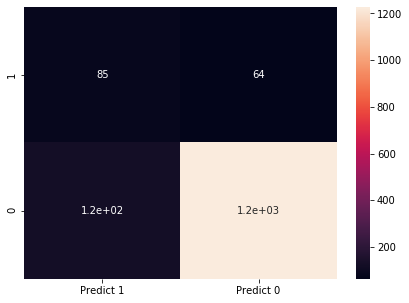

In [58]:
print("Confusion Matrix")
cm_naive_bayes=metrics.confusion_matrix(y_test, bayes_test_predict, labels=[1, 0])

df_cm_naive_bayes = pd.DataFrame(cm_naive_bayes, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_naive_bayes, annot=True)

In [59]:
confusion_matrix_naive = confusion_matrix(y_test, bayes_test_predict)
print(confusion_matrix_naive)

[[1227  124]
 [  64   85]]


The confusion matrix

True Positives (TP): we correctly predicted that they accepted personal loan = 85

True Negatives (TN): we correctly predicted that they did not accept personal loan = 1227

False Positives (FP): we incorrectly predicted that they accepted personal loan (a "Type I error") = 124 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they have not accepted personal loan (a "Type II error") 64 Falsely predict negative Type II error

## Question 7: Give your reasoning on which is the best model in this case and why it performs better?

**Observation:** The Logistic Regression model has a great accuracy and the accuracy of the train and test set is almost similar. Also the precsion and recall accuracy is good. The confusion matrix gives better results(more TP's and TN's)

In kNN, though the accuracy is good and confusion matrix has more number of TP's and TN's than other two models, the kNN model has data overfit as it performs extremely well with training data, but not with testing. The requirement is to classify the target. The KNN is distance based which not perfect for this situation.

The Naive Bayes algorithm, gives lesser accuracy in comaprision to other models meaning the probability of determing the target correctly is less.

## The Logistic Regression is the best fit model for the above case study